# Assignment-3 (Model interpretability)

Abstract-
The aim of this assignment is to develop a prediction model to determine if a person is suffering from   diabetes or not based on some predicted variables/independent variable.

In this notebook we will perform following activities.
1.Fit a linear model and interpret nodes.
2.Fit a tree-based model and interpret the nodes
3.Use auto ml to find the best model
4.Run SHAP analysis on the models from steps 1, 2, and 3,interpret the SHAP values and compare them with the other   model interpretability methods.




## Some installations further needed in the assignment

The pydotplus library is a Python interface to Graphviz's Dot language. It is often used in conjunction with other libraries, such as scikit-learn or networkx, for visualizing decision trees, graphs, and other structures.

If we're working with decision trees, for example, we might use pydotplus to visualize the tree generated by a machine learning model and in this assignment we are using decion tree and random forest.

In [1]:
pip install pydotplus

# Loading Libraries

In [2]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np
#plotting data and create visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance


In [38]:
url = "https://raw.githubusercontent.com/VivekReddy08/INFO6105DataScience/main/Football_Match%20Prediction.csv"
data = pd.read_csv(url)

## Data checking

In [39]:
data.head(10)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,5,19/08/00,Leicester,Aston Villa,0,0,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
6,6,19/08/00,Liverpool,Bradford,1,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
7,7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
8,8,19/08/00,Tottenham,Ipswich,3,1,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9,9,20/08/00,Man United,Newcastle,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6840 non-null   int64  
 1   Date           6840 non-null   object 
 2   HomeTeam       6840 non-null   object 
 3   AwayTeam       6840 non-null   object 
 4   FTHG           6840 non-null   int64  
 5   FTAG           6840 non-null   int64  
 6   FTR            6840 non-null   object 
 7   HTGS           6840 non-null   int64  
 8   ATGS           6840 non-null   int64  
 9   HTGC           6840 non-null   int64  
 10  ATGC           6840 non-null   int64  
 11  HTP            6840 non-null   float64
 12  ATP            6840 non-null   float64
 13  HM1            6840 non-null   object 
 14  HM2            6840 non-null   object 
 15  HM3            6840 non-null   object 
 16  HM4            6840 non-null   object 
 17  HM5            6840 non-null   object 
 18  AM1     

In [41]:
data.describe()

,Unnamed: 0,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,3419.500000,1.527485,1.130263,24.416667,24.514327,24.497807,24.347515,1.209014,1.226768,19.500000,...,0.057602,0.014327,0.062865,0.016520,0.051023,0.010234,-0.009690,0.014539,-0.017755,-0.018086
std,1974.682253,1.297913,1.124566,17.178524,17.136894,16.401571,16.341557,0.530186,0.523176,10.966658,...,0.233007,0.118846,0.242739,0.127475,0.220062,0.100651,0.693593,0.692937,0.668523,0.408488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.333333,-2.363636,-2.250000
25%,1709.750000,1.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.888889,0.906250,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.464286,-0.451613,-0.176471
50%,3419.500000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.172414,1.192308,19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.076923,-0.050000,0.000000,0.000000
75%,5129.250000,2.000000,2.000000,35.000000,35.000000,36.000000,36.000000,1.555556,1.562500,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.421053,0.428571,0.153846
max,6839.000000,9.000000,7.000000,102.000000,105.000000,85.000000,82.000000,2.736842,2.761905,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.500000,2.285714,2.250000


In [42]:
data.isnull().sum()

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

## Splitting the data into training and testing dataset

In [44]:
#Gettig the list of categorical features
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['Date',
  'HomeTeam',
  'AwayTeam',
  'FTR',
  'HM1',
  'HM2',
  'HM3',
  'HM4',
  'HM5',
  'AM1',
  'AM2',
  'AM3',
  'AM4',
  'AM5',
  'HTFormPtsStr',
  'ATFormPtsStr'],
 16)

In [45]:
# converting categorical features into numerical
for cat_col in cat_cols:
  classes = list(np.unique(data[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  data[cat_col].replace(classes, tokens, inplace=True)

In [46]:
y= data.FTR

In [47]:
x=data.drop('FTR',axis=1)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Linear model building using Logistic Regression

In [49]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
ATGS,0.041036
FTAG,0.034835
HTGC,0.031304
ATFormPts,0.017323
ATGD,0.004077
ATP,0.003364
AwayTeam,0.003346
HM2,0.002588
AM3,0.002561
AM5,0.002440


### Convert above log odd functions to regular odds:

Fit a linear model and interpret the regression coefficients

Ans: When the variable ATGS is increased by one unit, the odds of winning the match in the target class ("2") increase by more than 1x (i.e. 1.041) compared to the odds of not winning in the target class. In contrast, as FTHG  rises by one unit, the chances of winning in the target class rise by only 0.951082.




In [51]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ATGS,1.041890
FTAG,1.035449
HTGC,1.031799
ATFormPts,1.017474
ATGD,1.004085
ATP,1.003369
AwayTeam,1.003351
HM2,1.002591
AM3,1.002564
AM5,1.002443


## Tree based model building using XGBoost.

In [52]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [53]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))

0.9992690058479532


We're using the XGBoost classifier (xgb_cl) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.

The prediction accuracy is 99.92%.

### Fit the tree model and interpret the nodes-

Fit a tree-based model and interpret the nodes
Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'FTHG'. Node interpretability  for for first 3 trees is shown below.

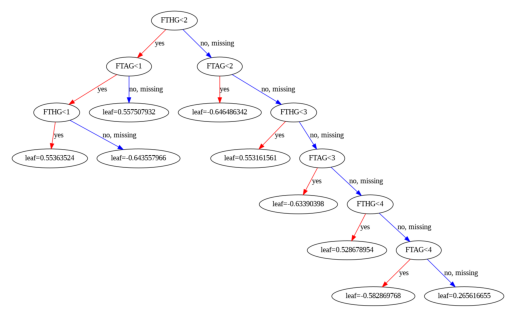

In [54]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

### Second tree plotted with XGBoost algorithm.

In [55]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()


### Third tree plotted with XGBoost algorithm.

In [56]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()


## Using AutoML to find the best model.

In [57]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.3 MB/s eta 0:00:00


In [58]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator


In [59]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222


In [60]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


This above code calculates the min_mem_size (minimum memory size) based on a percentage (pct_memory) of the available virtual memory on the system using the psutil library.

In [61]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:40175..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsauzjxai
  JVM stdout: /tmp/tmpsauzjxai/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsauzjxai/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:40175
Connecting to H2O server at http://127.0.0.1:40175 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_qktr9u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


This above code snippet is attempting to start an H2O server with a randomly chosen port number in the range of 5555 to 55555 using the h2o.init function in Python. If an exception occurs during initialization, it logs the error, downloads all logs, shuts down the H2O cluster, and exits the script with a status code of 2.



In [62]:
url = "https://raw.githubusercontent.com/VivekReddy08/INFO6105DataScience/main/Football_Match%20Prediction.csv"
data = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [63]:
data.head()

C1,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19/08/00,Leicester,Aston Villa,0,0,NH,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,19/08/00,Tottenham,Ipswich,3,1,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,20/08/00,Man United,Newcastle,2,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
data.types

{'C1': 'int',
 'Date': 'enum',
 'HomeTeam': 'enum',
 'AwayTeam': 'enum',
 'FTHG': 'int',
 'FTAG': 'int',
 'FTR': 'enum',
 'HTGS': 'int',
 'ATGS': 'int',
 'HTGC': 'int',
 'ATGC': 'int',
 'HTP': 'real',
 'ATP': 'real',
 'HM1': 'enum',
 'HM2': 'enum',
 'HM3': 'enum',
 'HM4': 'enum',
 'HM5': 'enum',
 'AM1': 'enum',
 'AM2': 'enum',
 'AM3': 'enum',
 'AM4': 'enum',
 'AM5': 'enum',
 'MW': 'int',
 'HTFormPtsStr': 'enum',
 'ATFormPtsStr': 'enum',
 'HTFormPts': 'int',
 'ATFormPts': 'int',
 'HTWinStreak3': 'int',
 'HTWinStreak5': 'int',
 'HTLossStreak3': 'int',
 'HTLossStreak5': 'int',
 'ATWinStreak3': 'int',
 'ATWinStreak5': 'int',
 'ATLossStreak3': 'int',
 'ATLossStreak5': 'int',
 'HTGD': 'real',
 'ATGD': 'real',
 'DiffPts': 'real',
 'DiffFormPts': 'real'}

In [66]:
data['FTR'] = data['FTR'].asfactor()
print(data['FTR'].isfactor())

[True]


In [67]:
data.describe()

Rows:6840
Cols:40

,C1,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
type,int,enum,enum,enum,int,int,enum,int,int,int,int,real,real,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,int,int,int,int,int,int,int,int,int,int,real,real,real,real
mins,0.0,,,,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,1.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.3333333333333335,-2.363636363636364,-2.25
mean,3419.5,,,,1.5274853801169586,1.1302631578947366,,24.41666666666666,24.51432748538012,24.497807017543867,24.347514619883032,1.2090137497952782,1.2267682674117641,,,,,,,,,,,19.499999999999986,,,6.242690058479532,6.41359649122807,0.062280701754385964,0.017982456140350878,0.05760233918128655,0.01432748538011696,0.06286549707602339,0.01652046783625731,0.0510233918128655,0.01023391812865497,-0.009689931637936676,0.014538977451303456,-0.01775451761648686,-0.018086116814832878
maxs,6839.0,,,,9.0,7.0,,102.0,105.0,85.0,82.0,2.736842105263158,2.761904761904762,,,,,,,,,,,38.0,,,15.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.5,2.2857142857142856,2.25
sigma,1974.6822529207072,,,,1.2979131544879186,1.1245662045694267,,17.178524271729763,17.136894081171643,16.401571466982293,16.341557203890012,0.5301863245789216,0.5231764983633135,,,,,,,,,,,10.966657785303955,,,3.582486001590236,3.549761880155801,0.24168234414003137,0.1328972141428824,0.23300696806140028,0.11884558677151143,0.2427386262769929,0.12747516502319245,0.2200615488539626,0.10065121032522105,0.6935927735902433,0.6929372562319596,0.6685233790373746,0.40848786994162056
zeros,1,,,,1596,2364,,263,249,256,265,305,274,,,,,,,,,,,0,,,400,341,6414,6717,6446,6742,6410,6727,6491,6770,464,480,515,840
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,19/08/00,Charlton,Man City,4.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,19/08/00,Chelsea,West Ham,4.0,2.0,H,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,19/08/00,Coventry,Middlesbrough,1.0,3.0,NH,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data.shape

(6840, 40)

In [69]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [70]:
print(data_train.shape)
print(data_test.shape)

(5471, 40)
(1369, 40)


In [71]:
data_train.head(2)

C1,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# Set the features and target
X=data.columns
print(X)

['C1', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']


In [73]:
# Set target and predictor variables
y ='FTR'
#y_numeric ='churn_bit'
X.remove(y)
#X.remove(y_numeric)
print(X)

['C1', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']


In [74]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [75]:
auml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240317_192855


GLM Model: summary
    family    link    regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.003139 )  nlambda = 30, lambda.max = 31.394, lambda.min = 0.003139, lambda.1se = 0.003139  2667                          2508                           61                      AutoML_1_20240317_192855_training_py_6_sid_bff8

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.008811883223814482
RMSE: 0.09387163162433304
LogLoss: 0.06983025404361204
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 5470
Residual degrees of freedom: 2962
Null deviance: 7556.734351428166
Residual deviance: 764.0826397452031
AIC: 5782.082639745203

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7729826000899499
       H     NH    Error    Rate
-----  ----  ----  -------  ------------
H      2541  0     0        (0.0/2541.0)
NH     0     2930  0        (0.0/2930.0)
Total  2541  2930  0        (0.0/5471.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.772983     1         200
max f2                       0.772983     1         200
max f0point5                 0.772983     1         200
max accuracy                 0.772983     1         200
max precision                0.999998     1         0
max recall                   0.772983     1         200
max specificity              0.999998     1         0
max absolute_mcc             0.772983     1         200
max min_per_class_accuracy   0.772983     1         200
max mean_per_class_accuracy  0.772983     1         200
max tns                      0.999998     2541      0
max fns                      0.999998     2672      0
max fps                      1.67673e-06  2541      399
max tps                      0.772983     2930      200
max tnr                      0.999998     1         0
max fnr                      0.999998     0.911945  0
max fpr                      1.67673e-06  1         399
max tpr                      0.772983     1         200

Gains/Lift Table: Avg response rate: 53.56 %, avg score: 53.56 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010053                    1                  1.86724   1.86724            1                1            1                           1                   0.0187713       0.0187713                  86.7235   86.7235            0.0187713
2        0.020106                    0.999998           1.86724   1.86724            1                0.999999     1                           1                   0.0187713       0.0375427                  86.7235   86.7235            0.0375427
3        0.030159                    0.999998           1.86724   1.86724            1                0.999998     1                           0.999999            0.0187713       0.056314                   86.7235   86.7235            0.056314
4  

In [76]:
print(auml.leaderboard)

model_id                                                      auc     logloss     aucpr    mean_per_class_error       rmse          mse
GLM_1_AutoML_1_20240317_192855                           1         0.0847363   1                    0            0.11186    0.0125126
StackedEnsemble_BestOfFamily_3_AutoML_1_20240317_192855  0.999996  0.0048316   0.999997             0.000787092  0.0259954  0.00067576
GBM_1_AutoML_1_20240317_192855                           0.999996  0.00230808  0.999996             0.000564194  0.0239549  0.000573836
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_192855  0.999995  0.00386946  0.999996             0.000564194  0.0258328  0.000667333
StackedEnsemble_AllModels_1_AutoML_1_20240317_192855     0.999995  0.00377898  0.999996             0.000787092  0.0254733  0.000648889
StackedEnsemble_BestOfFamily_2_AutoML_1_20240317_192855  0.999994  0.00387373  0.999995             0.000564194  0.0259109  0.000671376
XGBoost_2_AutoML_1_20240317_192855                 

The print(auml.leaderboard) statement would typically display the leaderboard of models generated by the H2O AutoML process. The leaderboard provides information about each model, such as model ID, model type, performance metrics, and other details.

In [77]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'GLM_1_AutoML_1_20240317_192855': 0}

we're working with H2O's AutoML (auml) in Python. The code we provided in above cell is creating a dictionary (models_dict) where the keys are model IDs and the values are corresponding indices. The indices are determined based on the order of appearance of different types of models in the leaderboard.

Here's a breakdown of the code:

1)model_index and glm_index are initialized to 0.
2)A loop is used to iterate through the model IDs in the AutoML leaderboard (auml_leaderboard_df).
3)For each model ID, the code updates the dictionary (models_dict) with the model ID as the key and the current index (model_index or glm_index) as the value.
4)The loop breaks when it encounters a model ID that does not contain 'StackedEnsemble', and the model_index is incremented.
5)Another loop is used to find the index of the first model ID that contains 'GLM', and the corresponding glm_index is updated.

In [78]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

0


3.Use auto ml to find the best model
Ans: Using AutoML, we have conclude'GLM' as the best model to determine which team to win. By referring the below variable importance and shap summary plots, we can say that 'FTR' is the most important and dominant feature in the model to predict target variable.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20240317_192855

,H,NH,Error,Rate
H,2541.0,0.0,0.0,(0.0/2541.0)
NH,0.0,2930.0,0.0,(0.0/2930.0)
Total,2541.0,2930.0,0.0,(0.0/5471.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

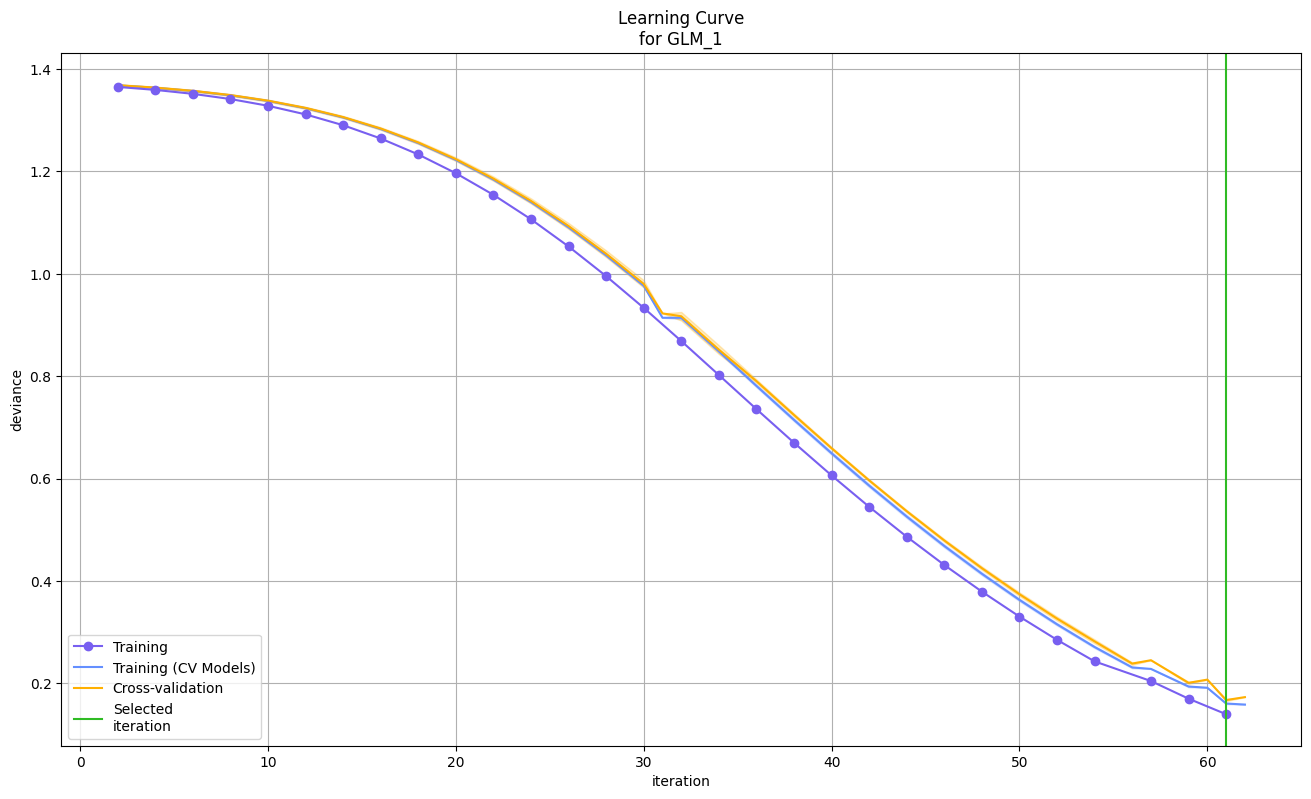

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

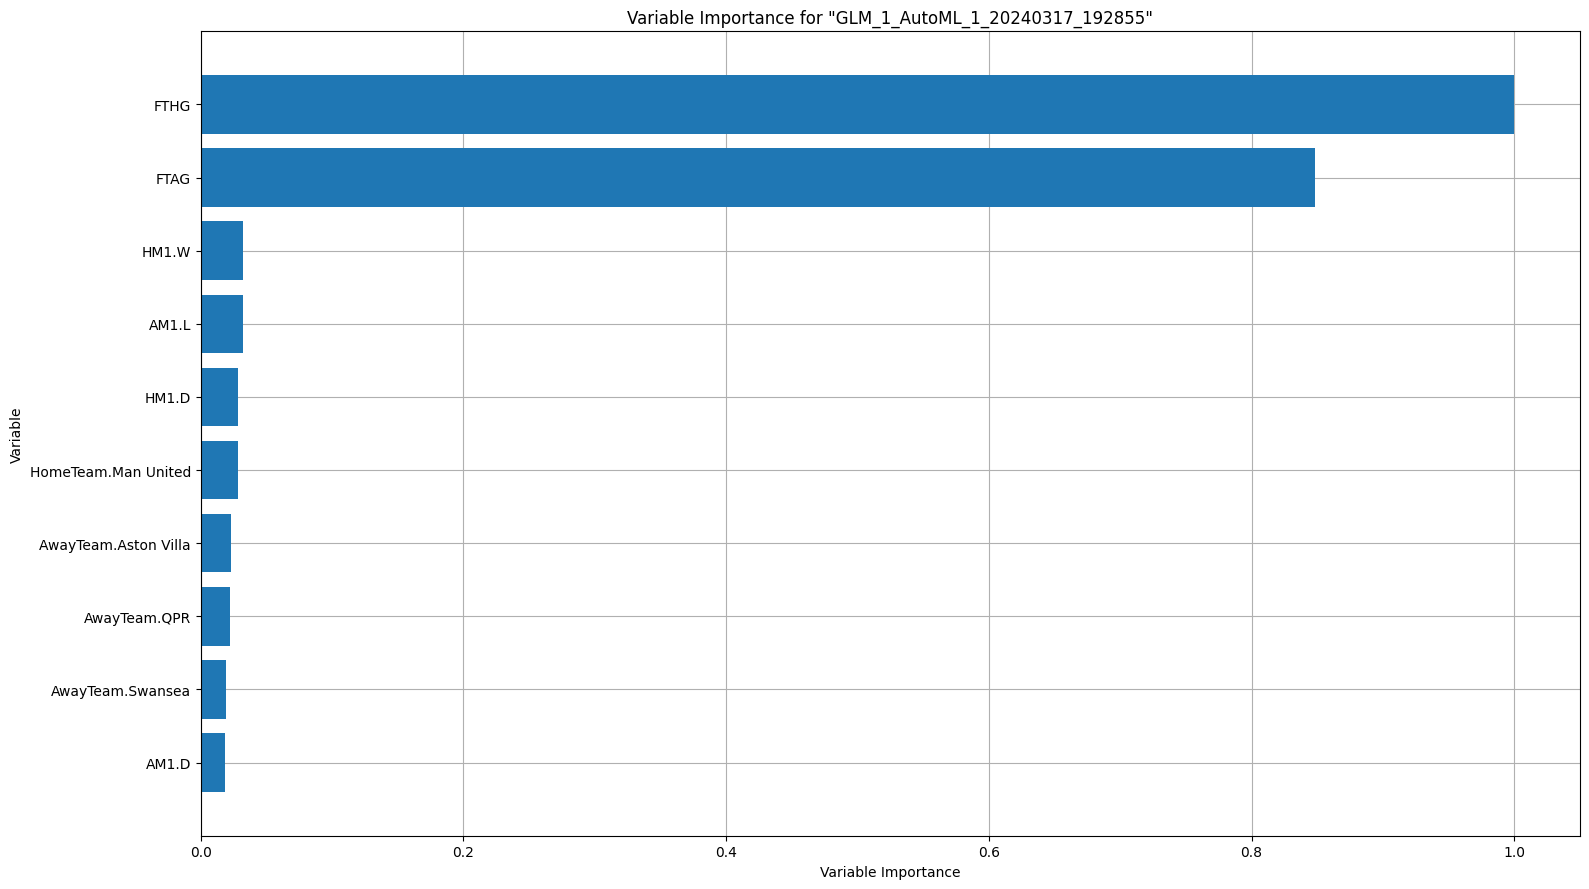

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

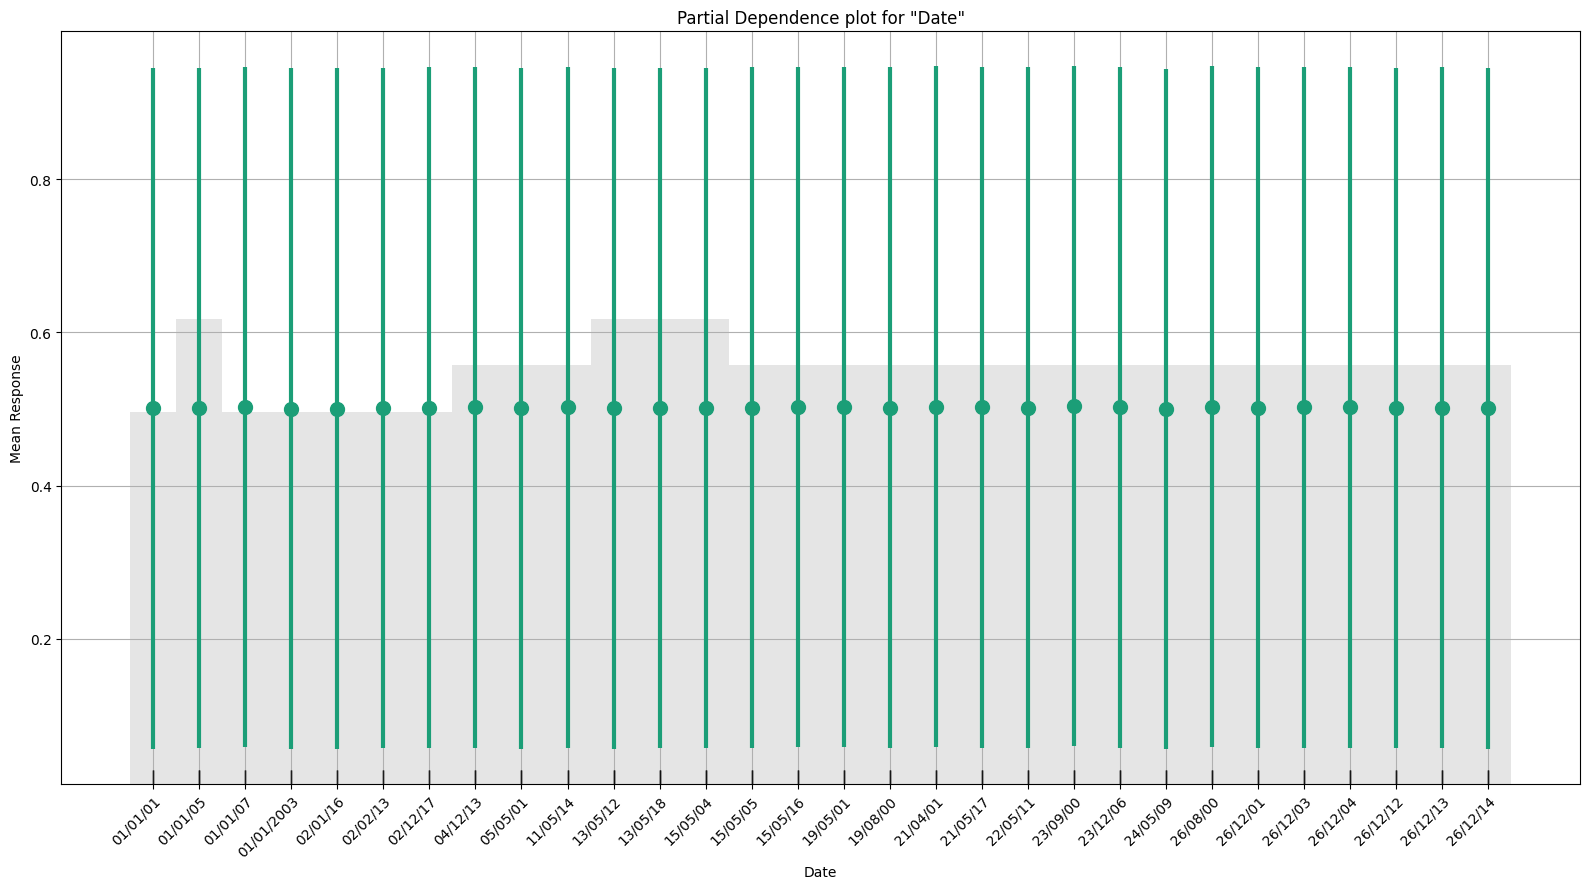

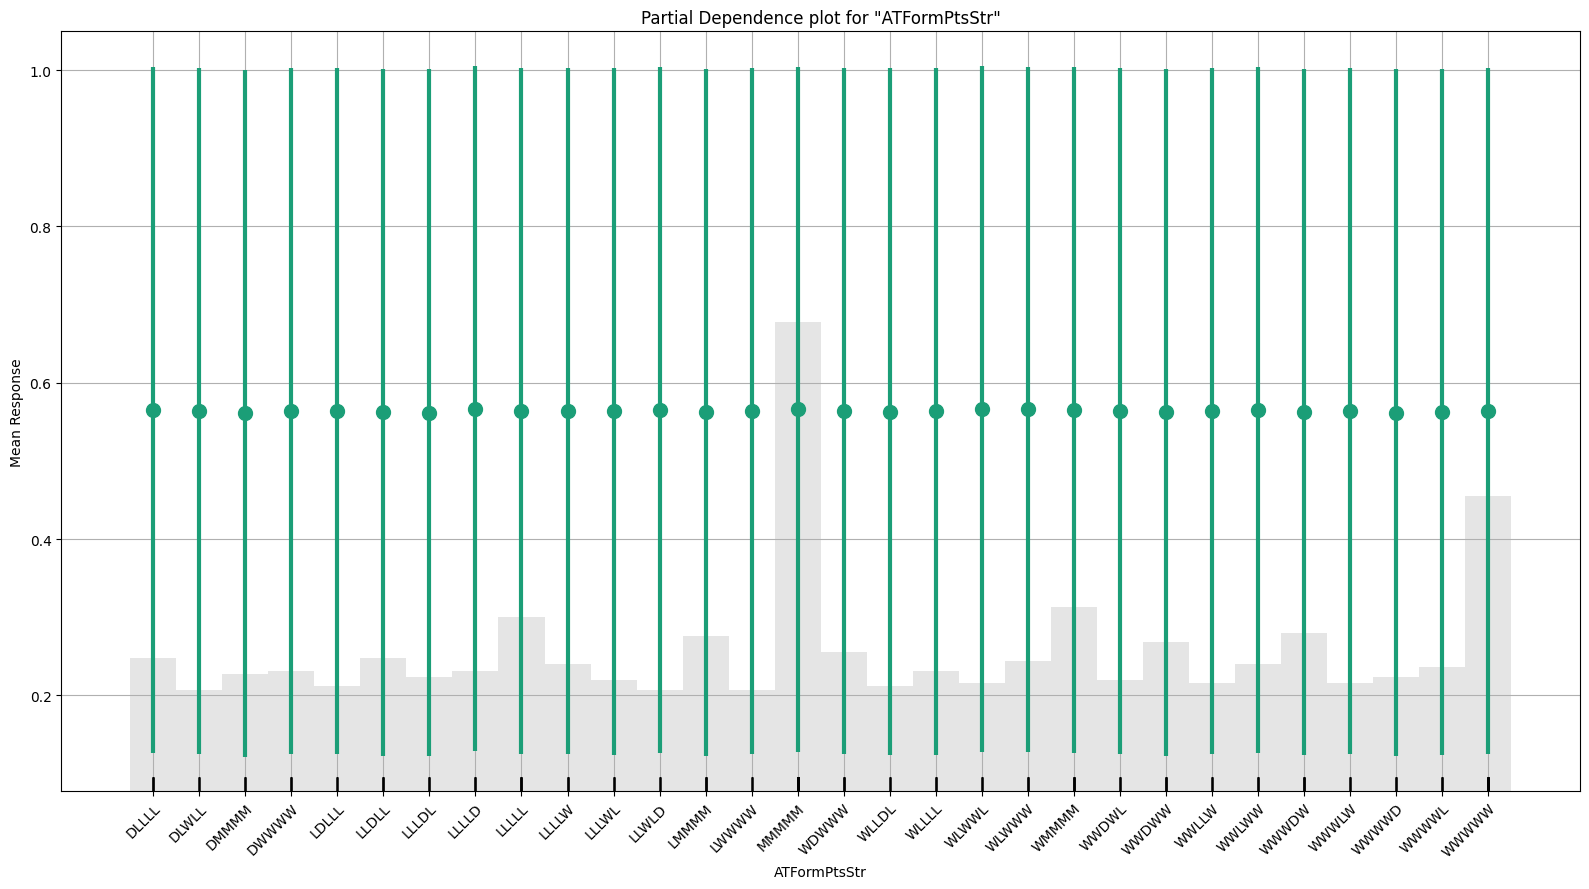

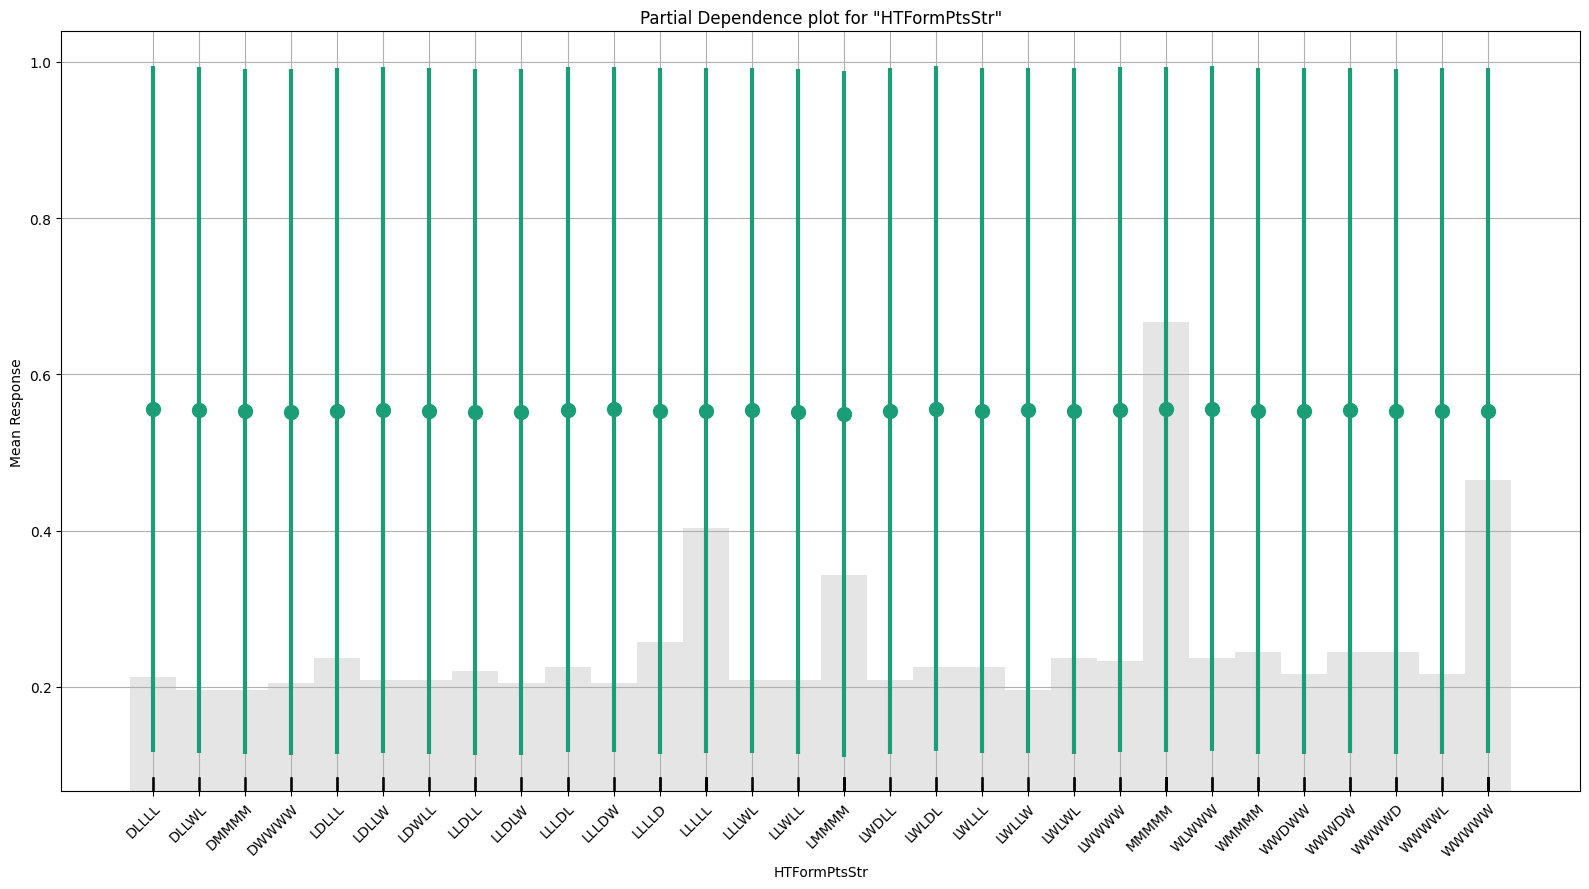

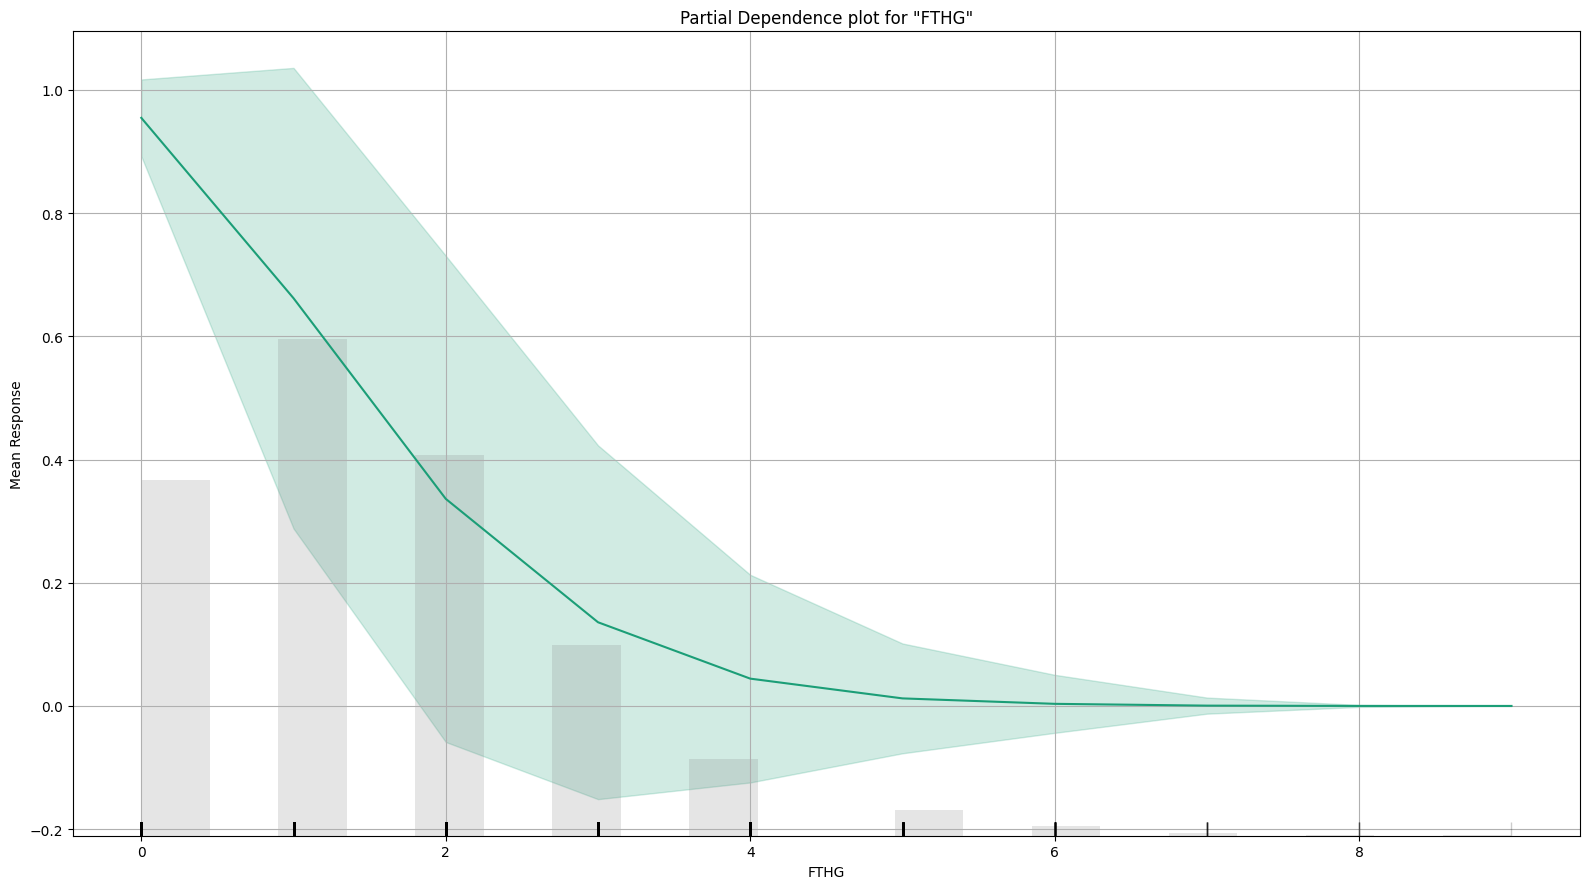

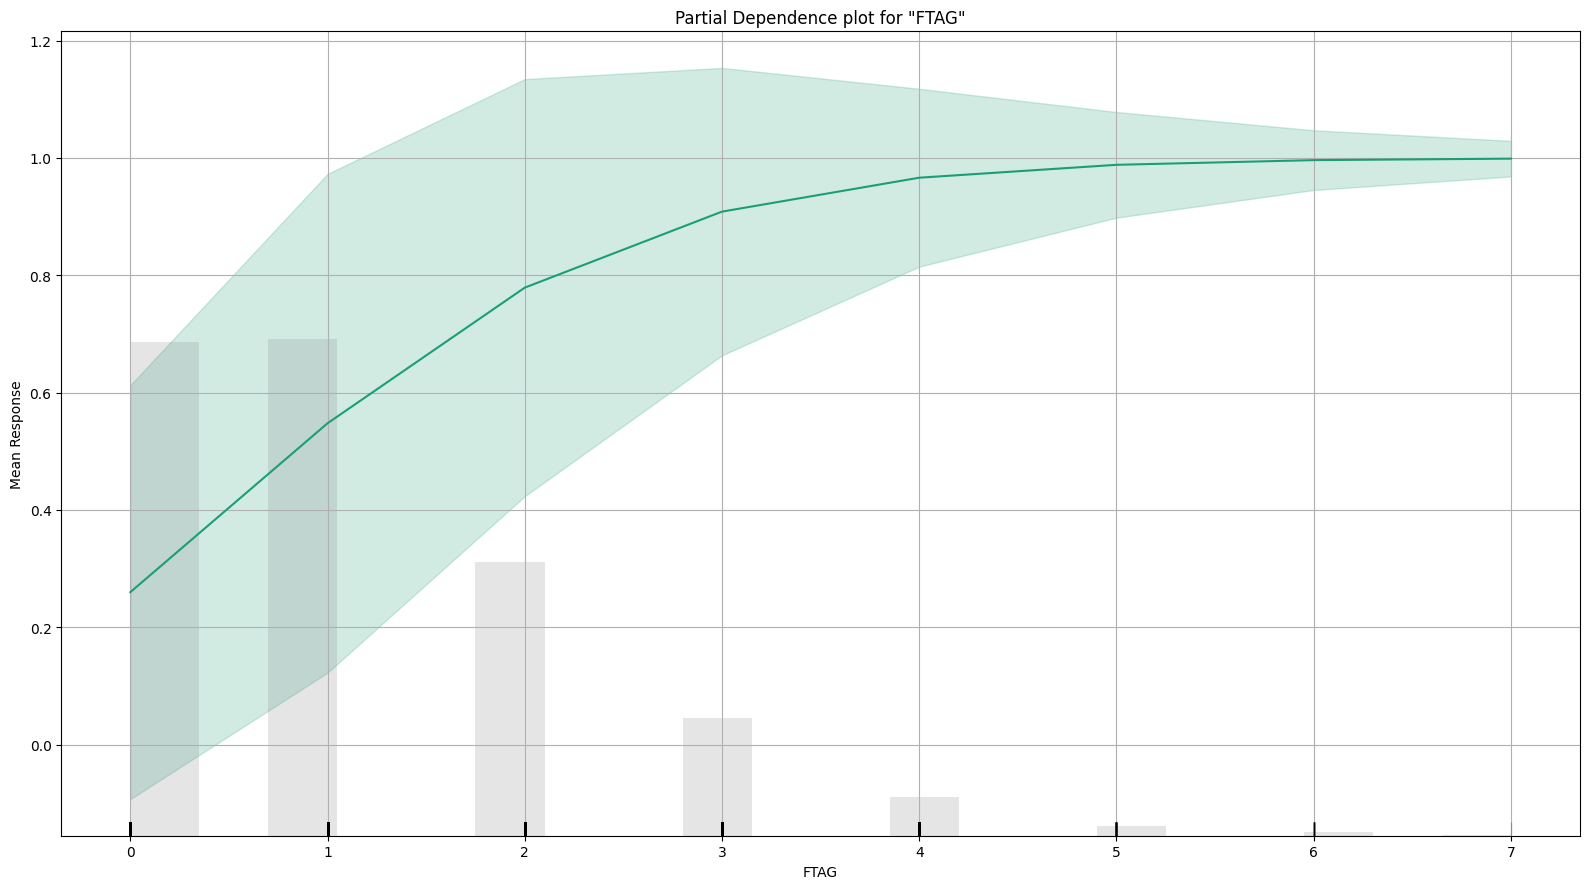

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20240317_192855

,H,NH,Error,Rate
H,2541.0,0.0,0.0,(0.0/2541.0)
NH,0.0,2930.0,0.0,(0.0/2930.0)
Total,2541.0,2930.0,0.0,(0.0/5471.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

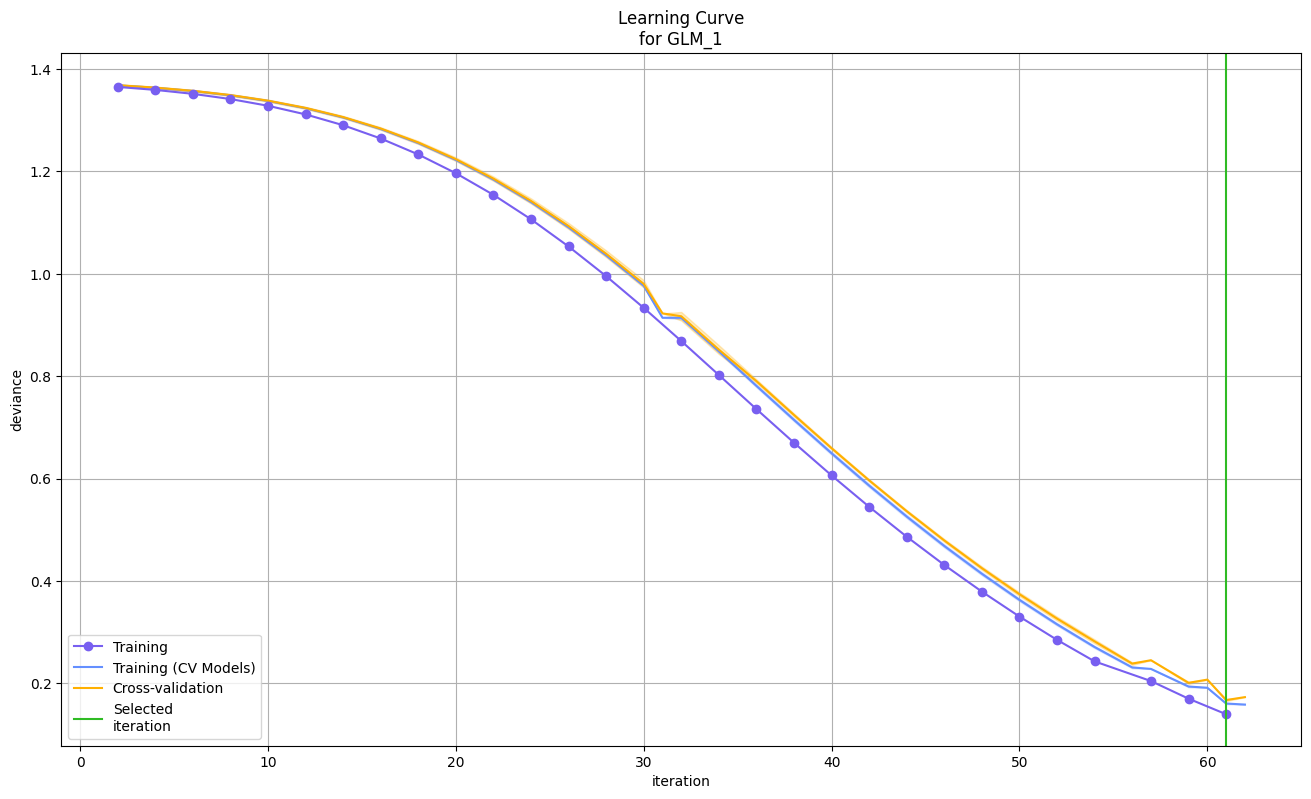

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

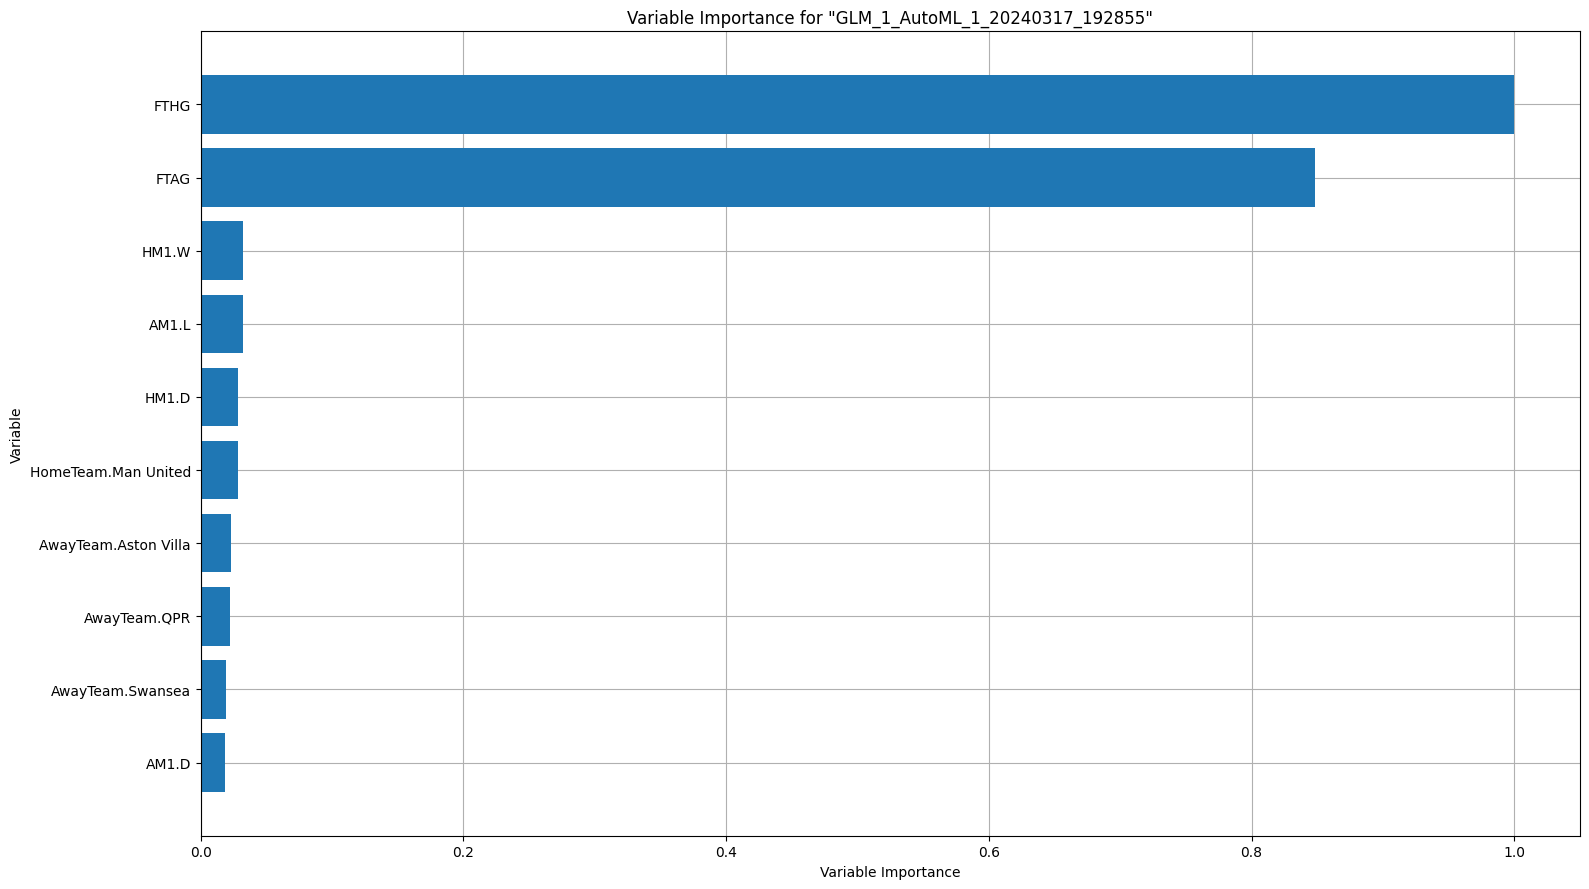

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

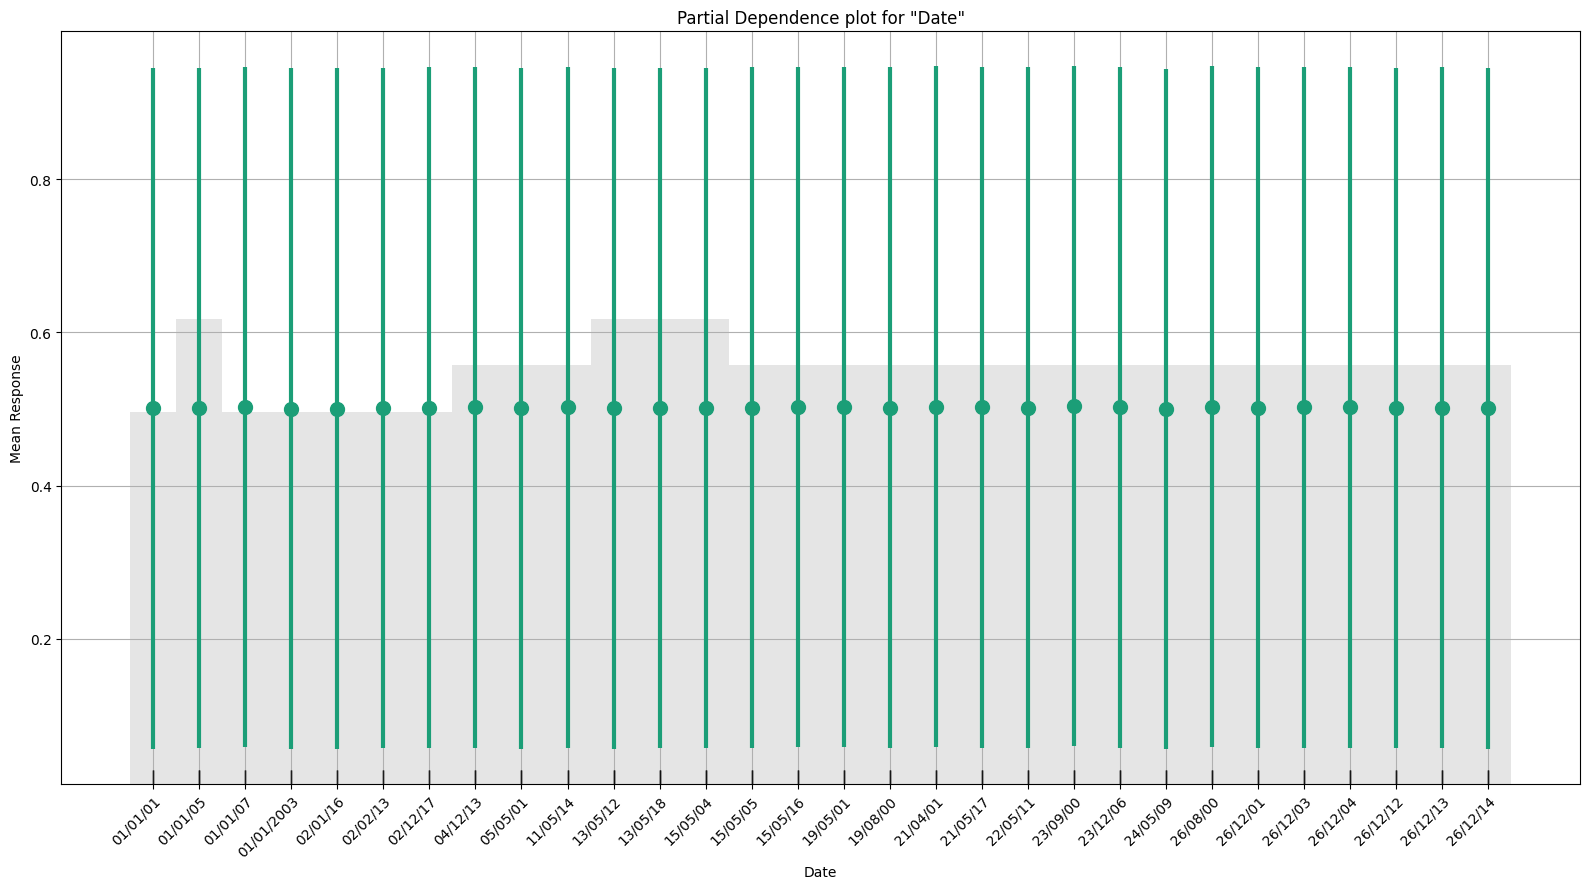

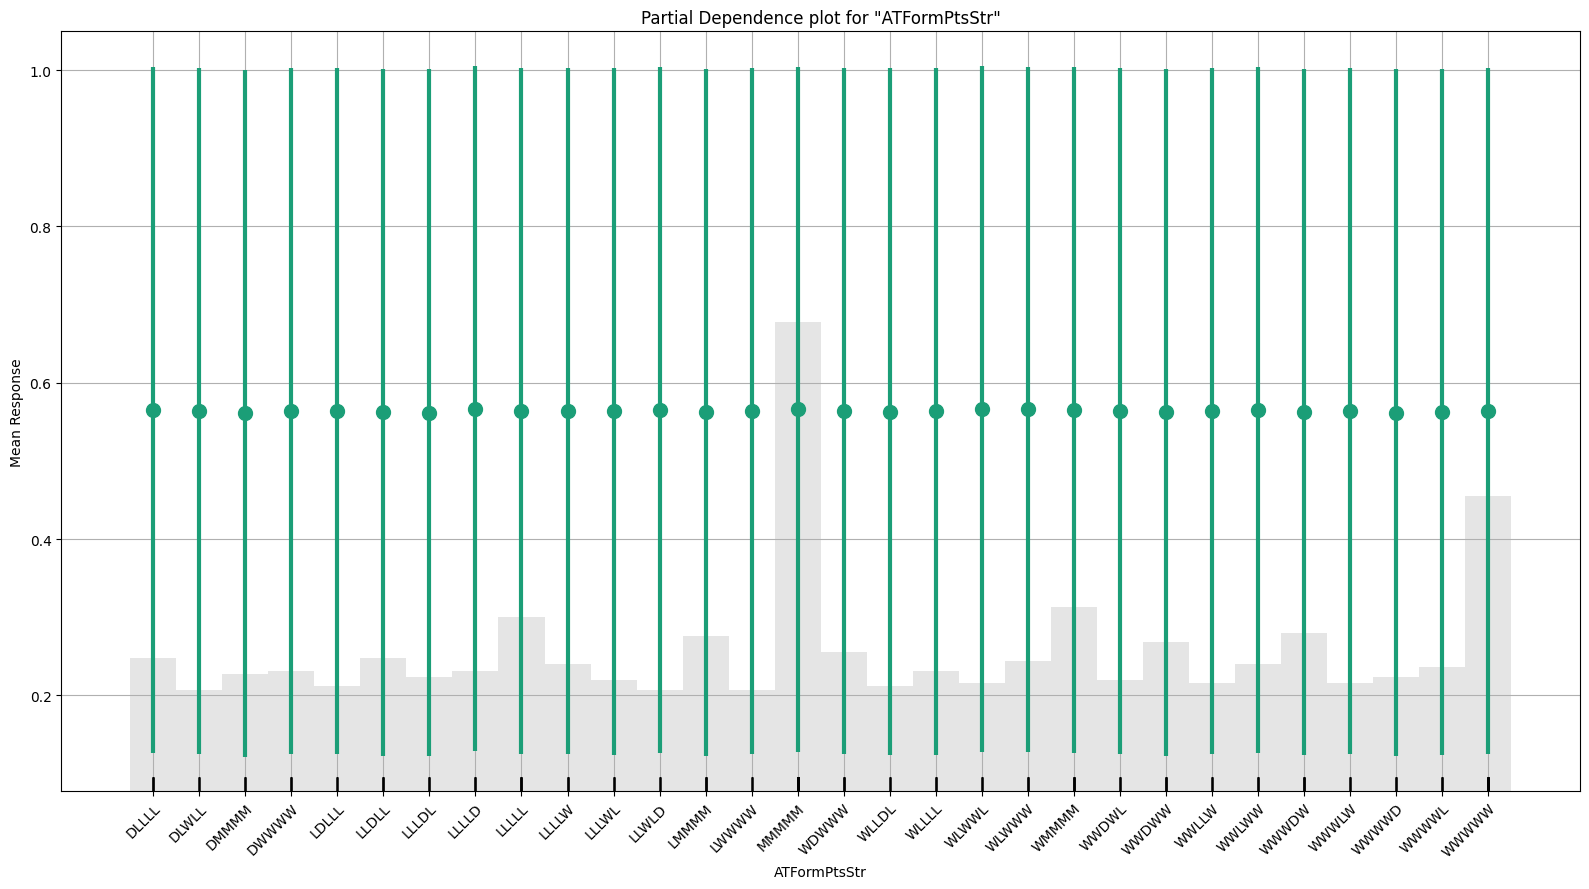

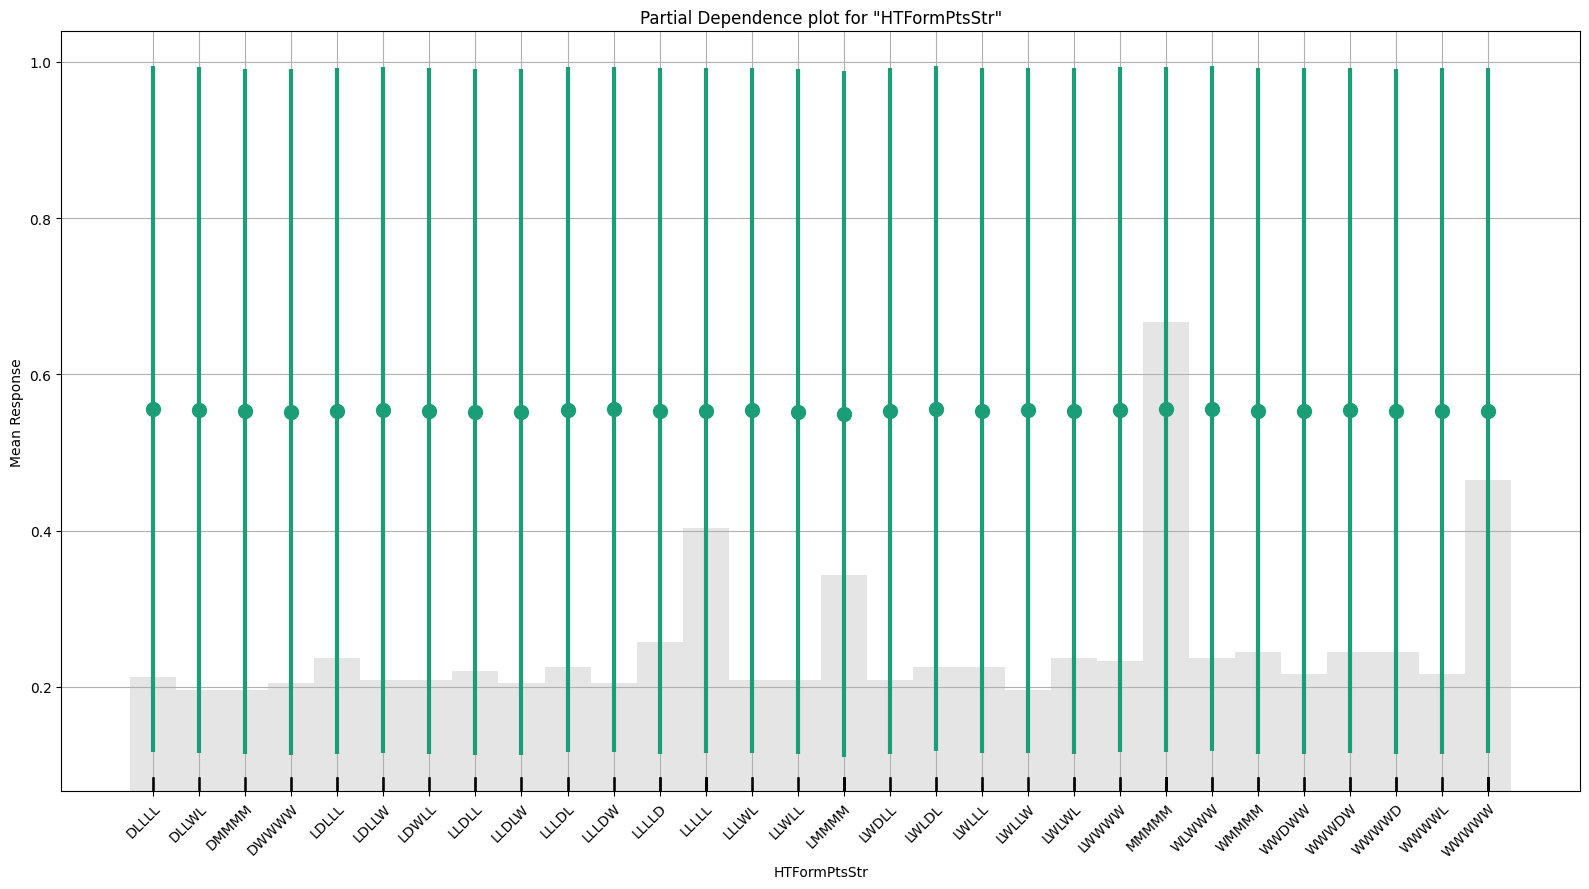

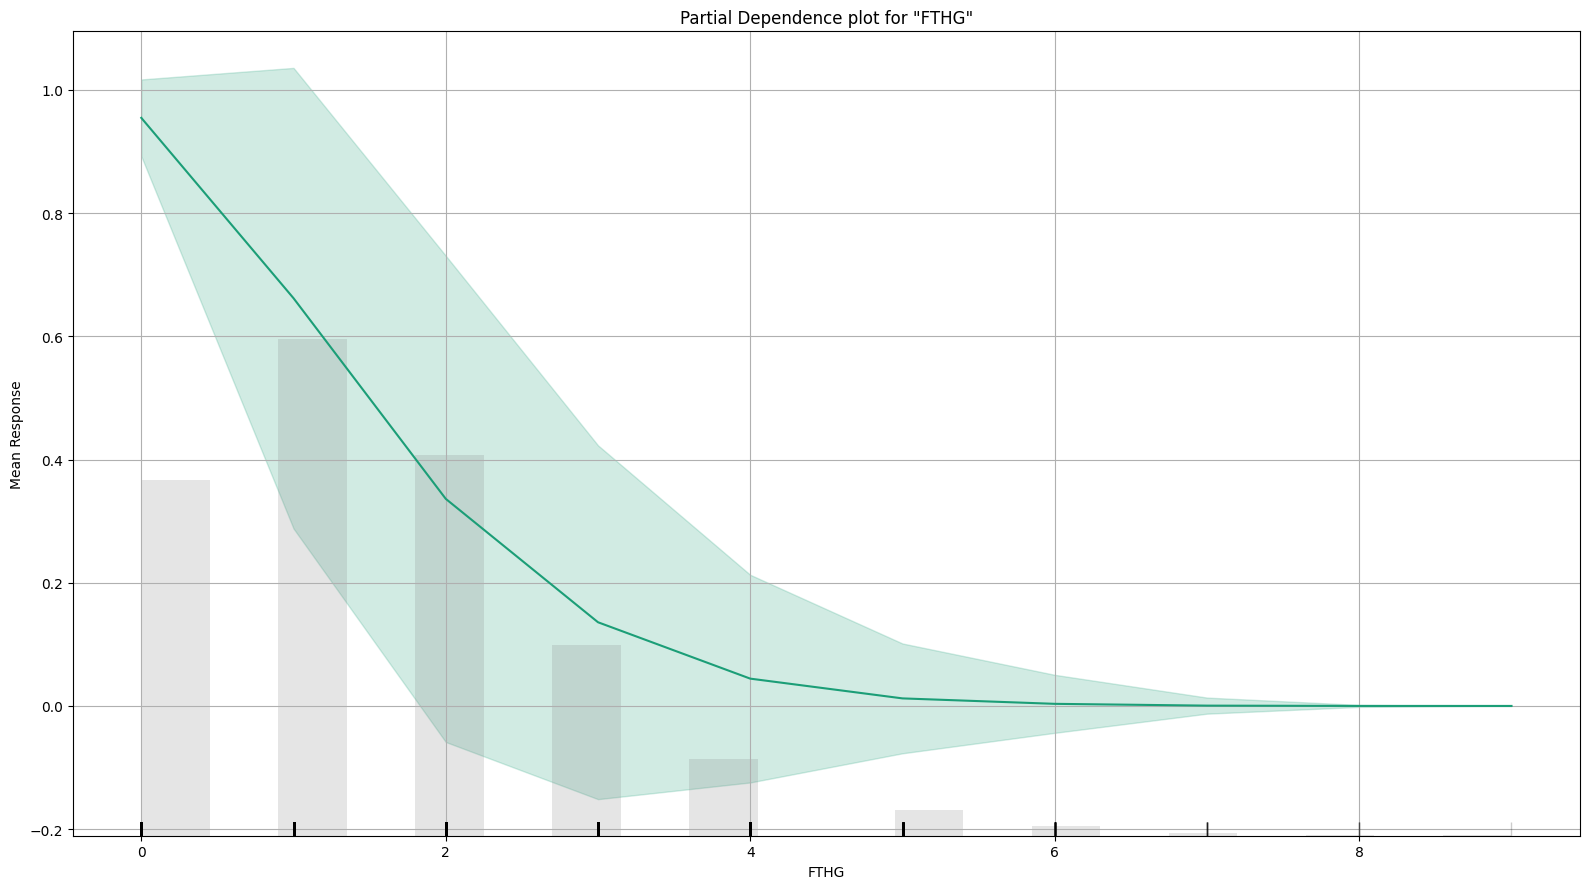

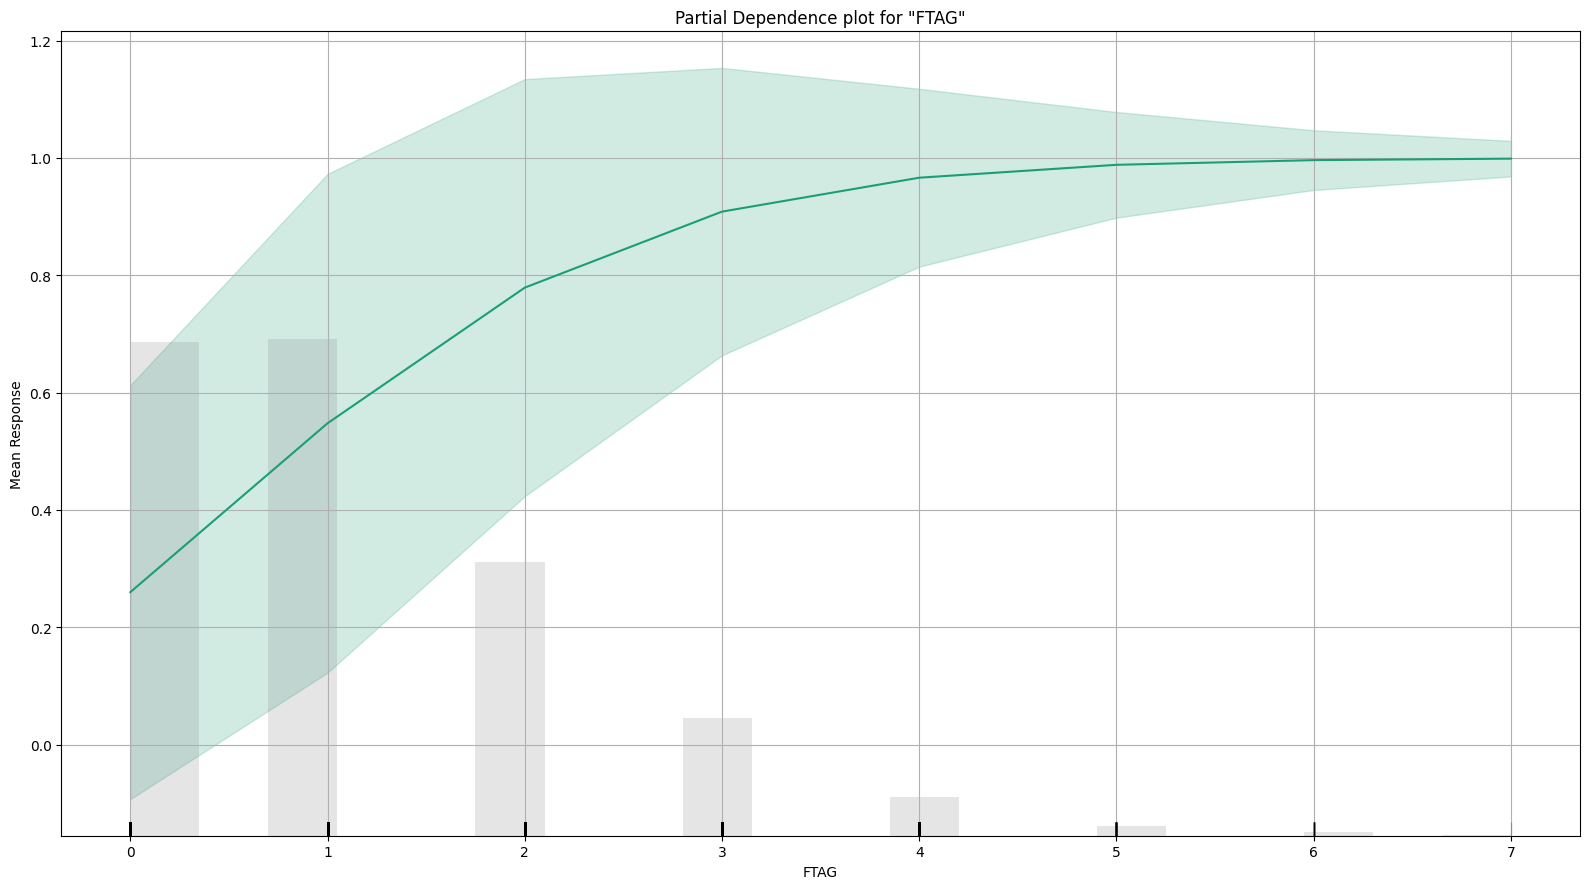

In [79]:
best_model.explain(data_train)

In [80]:
best_model.algo

'glm'

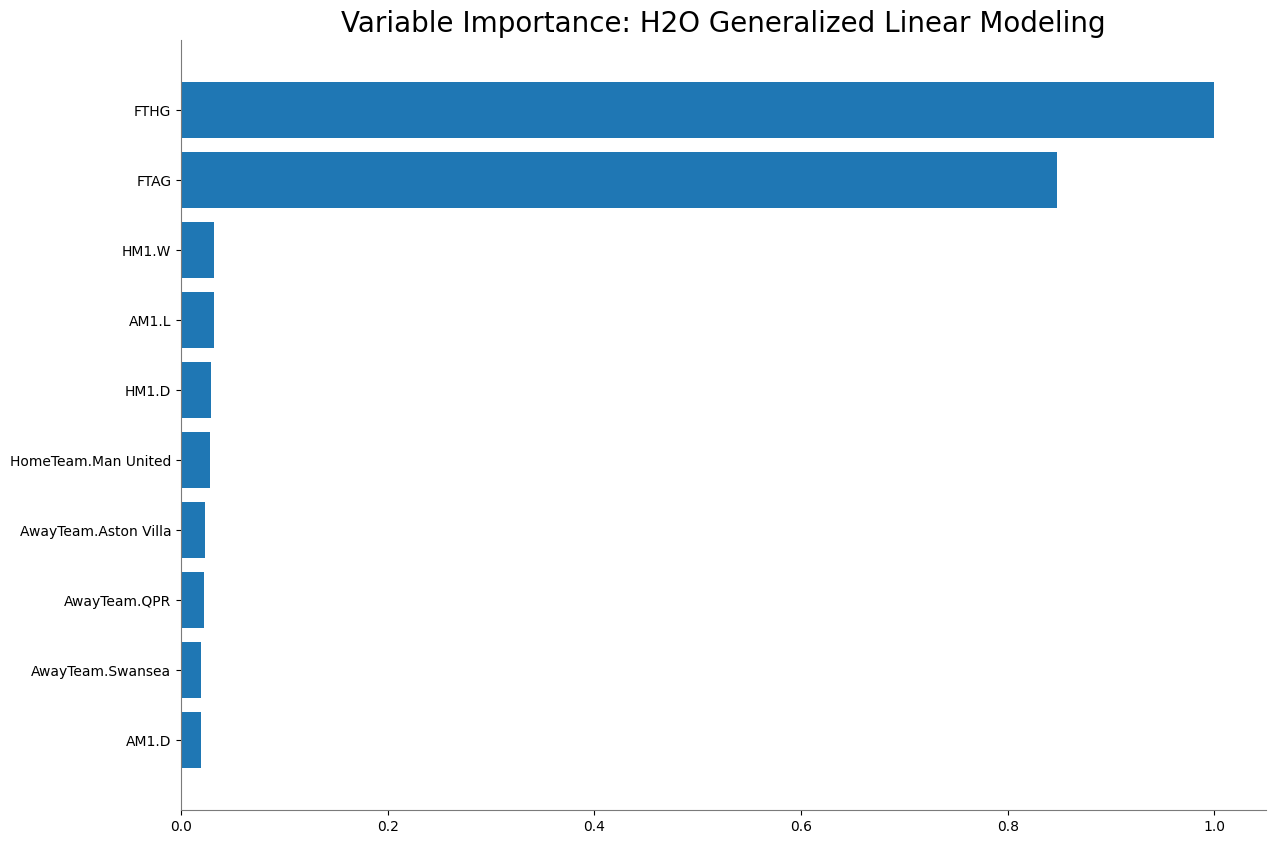

<Figure size 50000x10000 with 0 Axes>

In [81]:
if best_model.algo in ['glm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Above code checks if the algorithm of best_model is one of the specified algorithms. If it is, it calls the varimp_plot() method to generate the variable importance plot.

0
glm


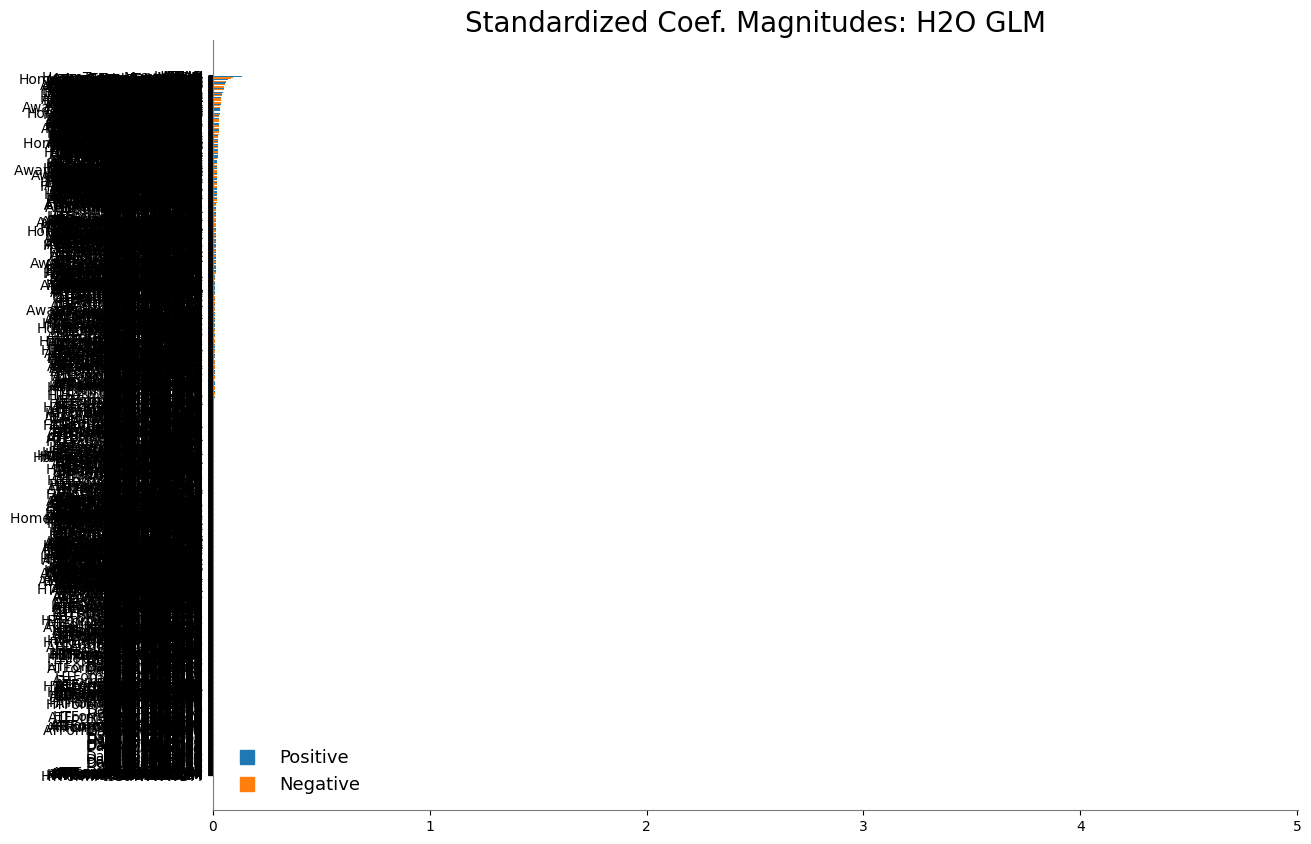

In [105]:
if glm_index == 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo)
  glm_model.std_coef_plot()

In above cell's code ,We have a conditional block in our code that checks if glm_index is not equal to 0. If this condition is true, it prints the value of glm_index, retrieves an H2O model using the model ID from the leaderboard, prints the algorithm used by the model, and finally, it calls std_coef_plot() on the glm_model.

In [90]:
print(best_model.auc(train = True))

1.0


The above print() command prints the area under curve for the best suitable algorithm ie GLM and area under curve is 100%

In [91]:
def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

We've defined a function model_performance_stats(perf) in above cell's code that takes an H2O performance object (perf) and tries to extract various performance metrics from it. The function uses try-except blocks to handle cases where a specific metric may not be available for the given performance object.

This function attempts to calculate various metrics related to model performance and stores them in a dictionary (d). If a specific metric calculation fails , the corresponding except block catches the exception, and the metric is not added to the dictionary.

the success of calculating these metrics depends on the nature of the model and the type of performance object passed to the function. The function is designed to be robust by handling potential exceptions gracefully.

In [92]:
mod_perf=best_model.model_performance(data_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.008706315002729498,
 'rmse': 0.09330763635806824,
 'null_degrees_of_freedom': 1368,
 'residual_degrees_of_freedom': -1140,
 'residual_deviance': 181.87346718493282,
 'null_deviance': 1890.6735129778317,
 'aic': 5199.873467184932,
 'logloss': 0.06642566369062558,
 'auc': 1.0,
 'gini': 1.0}

We're using our model_performance_stats function to extract various performance metrics from the performance of the best_model on the test data (data_test). This is a common approach to evaluate and understand the performance of a trained model on new or unseen data.

This will print or display a dictionary (stats_test) containing the computed performance metrics.

## Initialising the shap analysis on the model from step 1,2,3

In [93]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.1 MB/s eta 0:00:00


Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans:

After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'HTGS' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'HTFormPts' is the least important feature. According to beeswarm plot, higher value of 'HTGS' (2) leads to lower chance of away team winning. Lower value of 'HTGS' (1) leads to higher chance of away team winning.

For model 2 (i.e. XGBoost), 'HTGS' and 'HTFormPts' are the most and least significant features respectively contributing towards prediction of winner. According to summary plot, higher value of 'HTGS' leads to higher chance of home team winning. Lower value of 'HTGS' leads to higher chance of away team winning.

As per model 3 (i.e. GLM), by referring the above shap summary plot, 'HTGS' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'HTFormPts' is less important.

So, all 3 algorithms shows almost same results in terms of most and least dominant.



In [94]:
import shap

In [95]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

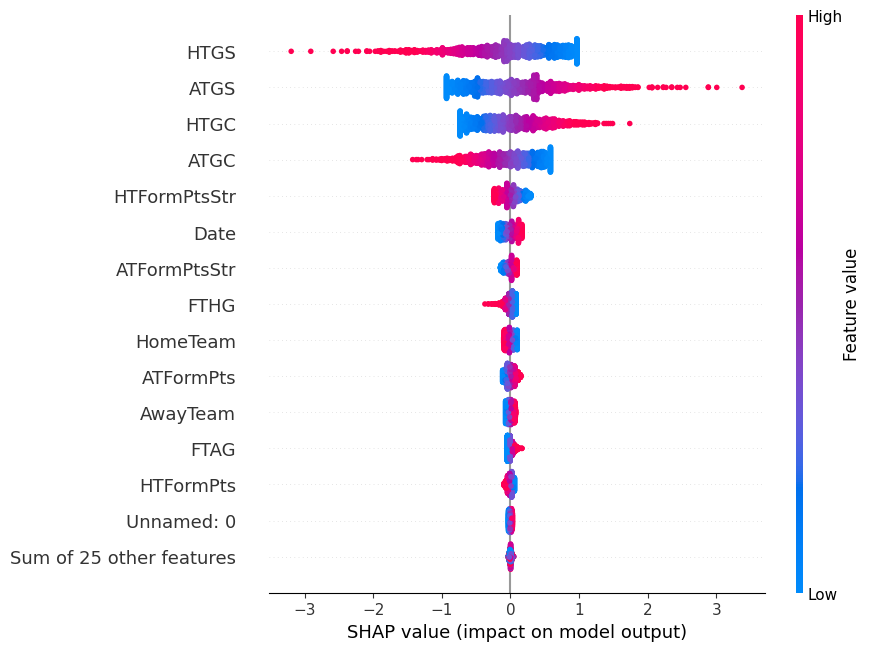

In [96]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

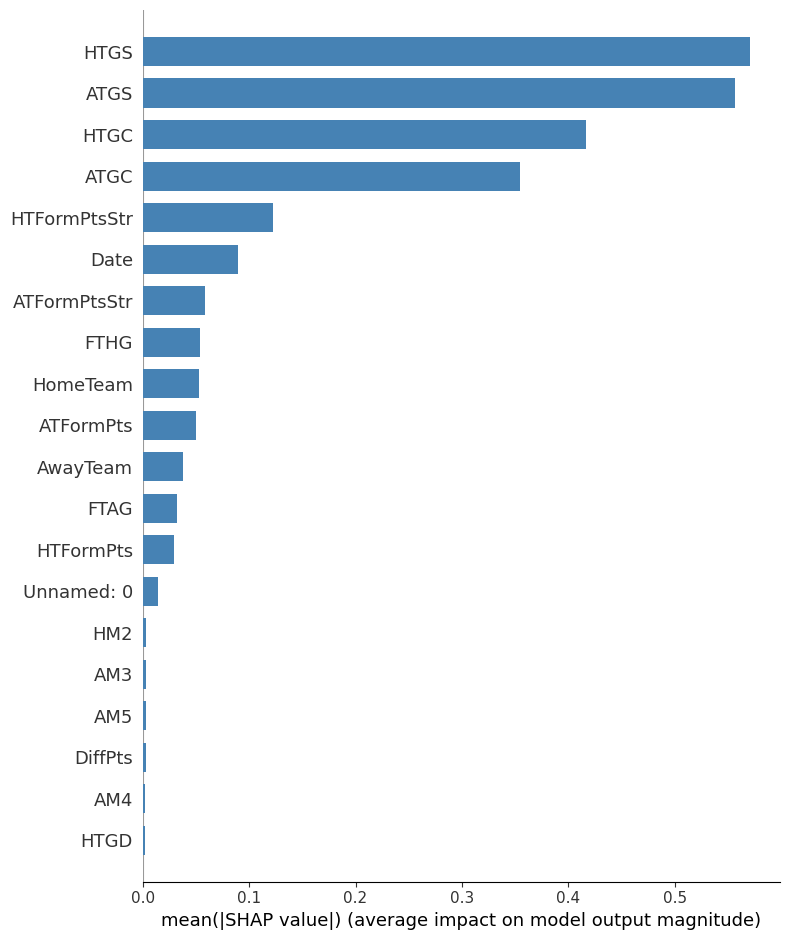

In [97]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

In [98]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

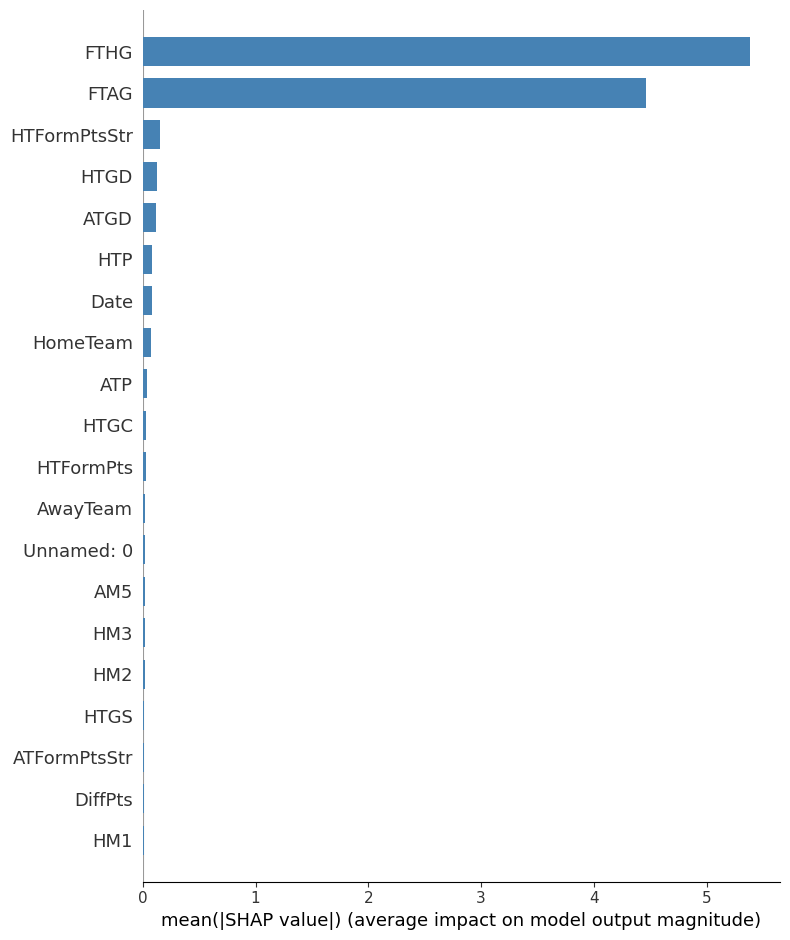

In [99]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

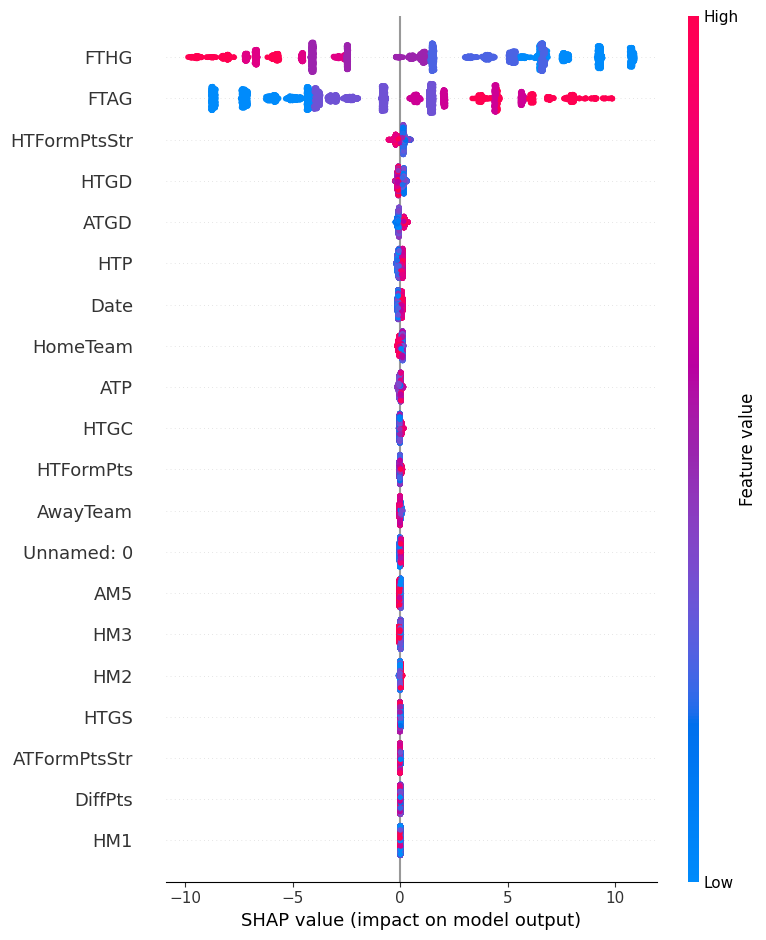

In [100]:
shap.summary_plot(shap_values, x_train)

## Questions and their answers-

1)Fit a linear model and interpret the regression coefficients-

Ans: When the variable ATGS is increased by one unit, the odds of winning the match in the target class ("2") increase by more than 1x (i.e. 1.041) compared to the odds of not winning in the target class. In contrast, as FTHG rises by one unit, the chances of winning in the target class rise by only 0.951082.

2)Fit a tree-based model and interpret the nodes

Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'FTHG'. Node interpretability  for for first 3 trees is shown below.

3)Use auto ml to find the best model

Ans: Using AutoML, we have conclude'GLM' as the best model to determine which team to win. By referring the below variable importance and shap summary plots, we can say that 'HTGS' is the most important and dominant feature in the model to predict target variable.

4)Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans:After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'HTGS' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'HTFormPts' is the least important feature. According to beeswarm plot, higher value of 'HTGS' (2) leads to lower chance of away team winning. Lower value of 'HTGS' (1) leads to higher chance of away team winning.

For model 2 (i.e. XGBoost), 'HTGS' and 'HTFormPts' are the most and least significant features respectively contributing towards prediction of winner. According to summary plot, higher value of 'HTGS' leads to higher chance of home team winning. Lower value of 'HTGS' leads to higher chance of away team winning.

As per model 3 (i.e. GLM), by referring the above shap summary plot, 'HTGS' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'HTFormPts' is less important.

So, all 3 algorithms shows almost same results in terms of most and least dominant.






### Conclusion

Build a predictive model using Logistic regression, XGBoost, AutoML to predict whether a patient has diabetes based on a set of risk factors. Model interpretability was tested using shap analysis by plotting beeswarm and shap summary plots to compare all three models. We discovered that all three algorithms produce distinct outcomes, and that regularization can be used to improve the models.

MIT License

Copyright (c) 2024 VivekReddy08

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


### References
1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6)https://www.datacamp.com/community/tutorials/xgboost-in-python

7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

